In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Делаем матрицу весов
def Sum_Matrix(one,two):
    Rezult = [[0 for c in range(0, np.shape(one)[1])] for r in range(0, np.shape(one)[0])] 
    N = 1/np.shape(one)[0]
    for i in range(0, np.shape(one)[0]):
        for j in range(0, np.shape(one)[1]):
            Rezult[i][j] = (one[i][j]+two[i][j]) # сложение ячеек 
            if(i==j):
                Rezult[i][j] = 0
    return Rezult

In [3]:
# Рисуем символ 
def DisplayMatrix(matrix):
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, vmin = -1, vmax = 1, cmap='binary')
    fig.colorbar(cax)
    plt.show()

In [4]:
# Переводим матрицу в вектор 
def ConvertToVector(matrix):
    N = np.shape(matrix)[0] * np.shape(matrix)[1]
    Vec = np.array([[0 for k in range(N)] for i in range(1)])
    k = 0
    for i in range(np.shape(matrix)[0]):
        for j in range(np.shape(matrix)[1]):
            Vec[0,k] = matrix[i,j]
            k+=1
    return Vec

In [5]:
# наоборот 
def ConvertToMatrix(Vector,col,row):
    Matrix = np.array([[0 for k in range(int(np.shape(Vector)[1]/row))] for i in range(int(np.shape(Vector)[1]/col))])
    x = col+1
    XX=0
    YY=0
    for i in range(np.shape(Vector)[1]):
        if i == x-1:
            YY+=1
            XX=0
            x+=col
        Matrix[YY,XX] = Vector[0,i]
        XX+=1
    return Matrix

In [6]:
def Acc(one,two):
    N = np.shape(one)[0] * np.shape(one)[1]
    x = np.array([[0 for k in range(N)] for i in range(1)])
    x = ConvertToVector(two)
    h = True
    replay = 1
    for i in range(np.shape(one)[1]):
        if one[0][i]==x[0][i]:
            h = True
            replay = 1
        else:
            h = False
            replay = 1
            return h,replay   
    return h,replay

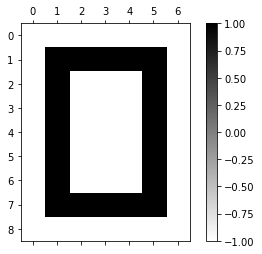

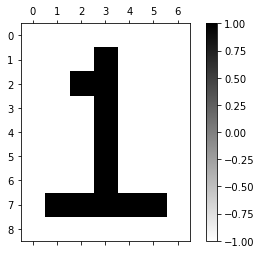

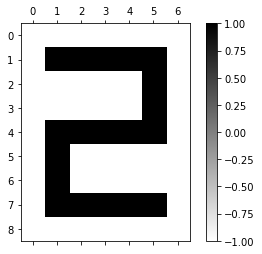

In [8]:
# 1 создаем образы
NumberNul = np.array([[-1,-1,-1,-1,-1,-1,-1],
                     [-1,1,1,1,1,1,-1],
                     [-1,1,-1,-1,-1,1,-1],
                     [-1,1,-1,-1,-1,1,-1],
                      [-1,1,-1,-1,-1,1,-1],
                      [-1,1,-1,-1,-1,1,-1],
                      [-1,1,-1,-1,-1,1,-1],
                      [-1,1,1,1,1,1,-1],
                      [-1,-1,-1,-1,-1,-1,-1]])
ListNumberNul = ConvertToVector(NumberNul)

NumberOne = np.array([[-1,-1,-1,-1,-1,-1,-1],
                      [-1,-1,-1,1,-1,-1,-1],
                      [-1,-1,1,1,-1,-1,-1],
                      [-1,-1,-1,1,-1,-1,-1],
                      [-1,-1,-1,1,-1,-1,-1],
                      [-1,-1,-1,1,-1,-1,-1],
                      [-1,-1,-1,1,-1,-1,-1],
                      [-1,1,1,1,1,1,-1],
                      [-1,-1,-1,-1,-1,-1,-1]])
ListNumberOne = ConvertToVector(NumberOne)

NumberTwo = np.array([[-1,-1,-1,-1,-1,-1,-1],
                     [-1,1,1,1,1,1,-1],
                     [-1,-1,-1,-1,-1,1,-1],
                     [-1,-1,-1,-1,-1,1,-1],
                     [-1,1,1,1,1,1,-1],
                     [-1,1,-1,-1,-1,-1,-1],
                     [-1,1,-1,-1,-1,-1,-1],
                     [-1,1,1,1,1,1,-1],
                     [-1,-1,-1,-1,-1,-1,-1]])
ListNumberTwo = ConvertToVector(NumberTwo)
DisplayMatrix(NumberNul)
DisplayMatrix(NumberOne)
DisplayMatrix(NumberTwo)

# Шаг 1. Обучение

In [8]:
# Обучение
a = np.dot(np.transpose(ListNumberNul),ListNumberNul) 
b = np.dot(np.transpose(ListNumberTwo),ListNumberTwo)
Weights = Sum_Matrix(a,b)

Искажённый образ...


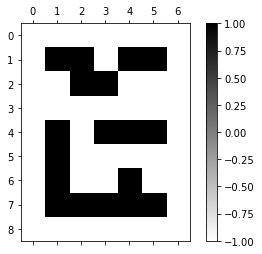

Зашумлённые данные
 [[-1 -1 -1 -1 -1 -1 -1]
 [-1  1  1 -1  1  1 -1]
 [-1 -1  1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1  1  1  1 -1]
 [-1  1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1  1 -1 -1]
 [-1  1  1  1  1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1]]


In [11]:
data = pd.read_csv("vvodk2.txt", sep='\t', header = None)
inputs = np.array(data)
print("Искажённый образ...")
DisplayMatrix(inputs)
# print("Зашумлённые данные\n",inputs)

# 2. Восстановление образа

Восстановление образа...

Индексы нейронов до перемешивания :
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62] 

Индексы нейронов после случайного  перемешивания :
 [36 51  7 45 54 17 27 22 35 42 53 49 24  0 44 55 14 23 29 61 33 12  2  9
 11  1 60 38 39 59 62 26 58  8 19 50 30 43 46  6 18 47 15 41 40 56 31 52
 16 10 20 32  5 13  3  4 48 28 25 21 37 34 57] 


 Индексы нейронов после случайного  перемешивания :
 [36 51  7 45 54 17 27 22 35 42 53 49 24  0 44 55 14 23 29 61 33 12  2  9
 11  1 60 38 39 59 62 26 58  8 19 50 30 43 46  6 18 47 15 41 40 56 31 52
 16 10 20 32  5 13  3  4 48 28 25 21 37 34 57] 

Проверка на стабильность №-1



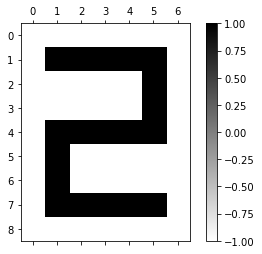


 Индексы нейронов после случайного  перемешивания :
 [53 50 35 19  0 46 31  3 17 37 45 62 10 26 42 25 57 24 52 49 59 30  1 22
 39 33  8 43 28  2 54  6 48  9 18  7 27 15 16 32 13  5 58 60 23 34 40 29
 41 14 38  4 21 12 51 11 36 61 44 47 55 56 20] 

Проверка на стабильность №-2



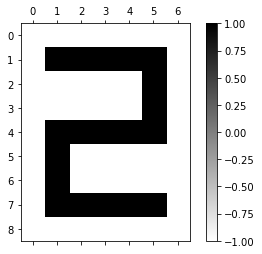


 Индексы нейронов после случайного  перемешивания :
 [17  1 30 48 43 33 28 41  7 55 38 40 11 47 62 39 58 29 61 56 13 21  0 36
 34  9 45 20 26 37 18  2 14 24 54 35 10 59 27 16 23  6 53 25 52 44  8 15
 42 57 49 31 32 19 22  5 51 46 50 12 60  4  3] 

Проверка на стабильность №-3



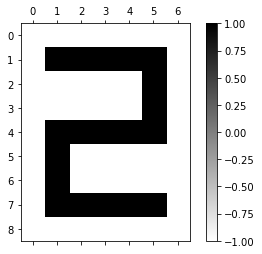


После Восстановление 
 [[-1 -1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1 -1]
 [-1 -1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1  1 -1]
 [-1  1  1  1  1  1 -1]
 [-1  1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1]]


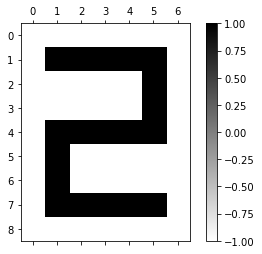

In [12]:
inputs = ConvertToVector(inputs) # Переводим в вектор полученный шум 
print("Восстановление образа...\n")
PreviousMatrix = np.array([[0 for k in range(np.shape(inputs)[1])] for i in range(1)]) # пустая матрица шума для хранения пред образа 
Sum = 0 # сумма вектора шума на столбец матрицы весов 
Niteration = 0 #
IndexWeights = np.array([k for k in range(np.shape(inputs)[1])]) # порядок нейронов матрицы весов 
print("Индексы нейронов до перемешивания :\n", IndexWeights,"\n")
np.random.shuffle(IndexWeights) # перемешивание порядка индексов матрицы весов 
print("Индексы нейронов после случайного  перемешивания :\n",IndexWeights,"\n")

while True: 
    p, replay = Acc(inputs,PreviousMatrix)                                 # проверка на совпадение (устойчивость)
    for u in range(replay):                                                # первый прогон восстановления образа 
        #--- перезапись ---    
        for l in range(np.shape(inputs)[0]):                               # сохраняется текущее состояния образа чтобы сверить со след          
            for g in range(np.shape(inputs)[1]):
                PreviousMatrix[l][g] = inputs[l][g]
        #---нахождение произведения 
        for j in range(np.shape(Weights)[1]):                              # цикл по столбцам матрицы весов 
            for i in range(np.shape(inputs)[1]):                           # цикл по столбцам матрицы шума
                Sum += inputs[0][i] * Weights[i][IndexWeights[j]]          # полэлементо умножаем шум на вес (слайд 9)     
        #---ф-ия активации       
            Sum = np.where(Sum>0,1,-1)                                      # фун - ция активации   
        #---замена знака    
            if Sum != inputs[0][IndexWeights[j]]:                           # 
                inputs[0][IndexWeights[j]] *= -1                            # в случае не совпадения занчения в векторе шума с знач в вектора ркз матриц весов
                Sum = 0                                                     # замена на противоположный знак 
        print("\n","Индексы нейронов после случайного  перемешивания :\n", IndexWeights,"\n")        
        np.random.shuffle(IndexWeights)                                      # заново перемешиваем порядко нейронов матрицы весов 
        Niteration+=1

        print(f'Проверка на стабильность №-{Niteration}\n')
        DisplayNewInputs = ConvertToMatrix(inputs,7,9)                      # перевод вектора в матрицу
        DisplayMatrix(DisplayNewInputs)
    #---условие остановы
    if p == True:                                                           # когда совпадут и три раза прогонятся 
        print('\nПосле Восстановление \n',DisplayNewInputs)
        DisplayNewInputs = ConvertToMatrix(inputs,7,9)
        DisplayMatrix(DisplayNewInputs)
        break